In [36]:

import random
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)


board_array = np.zeros((100,100), 'int')


for i in range (2000):
    randominteger1 = random.randint(1,99)
    randominteger2 = random.randint(1,99)
    board_array[randominteger1,randominteger2] = 1

# print(board_array)    
def blockshaped(arr, nrows, ncols):
    
    h, w = arr.shape
    assert h % nrows == 0, f"{h} rows is not evenly divisible by {nrows}"
    assert w % ncols == 0, f"{w} cols is not evenly divisible by {ncols}"
    return (arr.reshape(h//nrows, nrows, -1, ncols)
               .swapaxes(1,2)
               .reshape(-1, nrows, ncols))


def FrequencyHistogram(array):
    # Let us split NxN array to smaller 2x2 blcks
    super_cells_list =  []
    new_board = []
    threshold1 = 0.05
    # threshold2 = 0.06 # For multi state MNCA
    array = blockshaped(array,2,2)
    for each_sub_array in array:
        super_cells_list.append(list(each_sub_array.flatten()))
    for i in range(len(super_cells_list)):
        count = 0
        for j in range(len(super_cells_list)):
            if(super_cells_list[i]==super_cells_list[j]):
                count = count+1 # count is the number of blocks matching in grid.
        new_board.append(count/len(super_cells_list))
    for i in range(len(new_board)):
        if(new_board[i] < threshold1):
            new_board[i] = 1
        else: 
            # new_board[i] >= threshold1):
            new_board[i] = 0
            
    modified_board = np.array(new_board)
    shape = int(np.sqrt(len(new_board)))
    # print(shape)
    modified_board = modified_board.reshape(shape,shape)
    return modified_board

# print(FrequencyHistogram(board_array))

In [37]:
board_array.shape

(100, 100)

In [38]:
print(FrequencyHistogram(board_array).shape)

(50, 50)


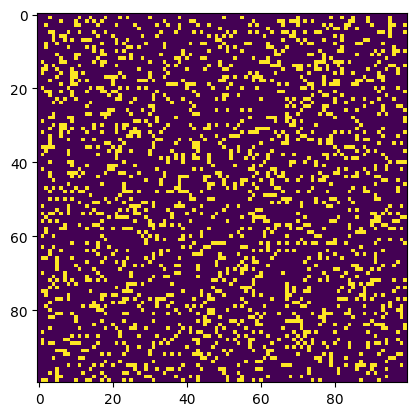

In [39]:
import matplotlib.pyplot as plt

plt.imshow(board_array)

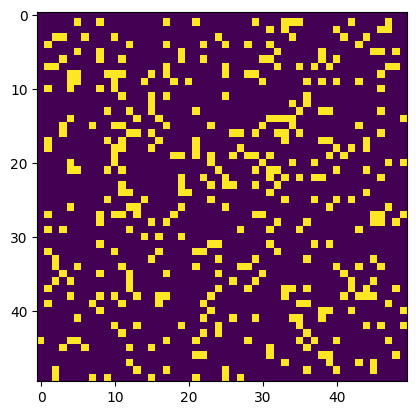

In [40]:

plt.imshow(FrequencyHistogram(board_array))